# CSE251B Project Milestone Starter File

## Step 1: Import Dependencies:

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import seaborn as sns

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torch_geometric.data import Data, Batch
import tqdm

## Step 2: Load the Dataset

#### You need to describe in your own words what the dataset is about, and use mathematical language and formulate your prediction task on the submitted PDF file for Question 1 Problem A.

#### Here we are loading the dataset from the local directory. And answer Question 1 Problem B

In [2]:
train_npz = np.load('./train.npz')
train_data = train_npz['data']
test_npz  = np.load('./test_input.npz')
test_data  = test_npz['data']

In [3]:
# print(train_data.shape, test_data.shape)
print(test_data.shape)

# Split once for later use
X_train = train_data[..., :50, :]
Y_train = train_data[:, 0, 50:, :2]

(2100, 50, 50, 6)


In [4]:
def plot_heatmap(data, title=None, bins=5):
    plt.figure(figsize=(6, 6))

    x_max = data[..., 0].max()
    x_min = data[..., 0].min()
    y_max = data[..., 1].max()
    y_min = data[..., 1].min()

    plt.hist2d(data[:, 0], data[:, 1], bins=bins, cmap='hot')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.title(title)
    plt.colorbar(label='Density')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.show()

In [5]:
xy_in = train_data[:, :, :50, :2].reshape(-1, 2)
# only find the x, y != 0
xy_in_not_0 = xy_in[(xy_in[:, 0] != 0) & (xy_in[:, 1] != 0)]

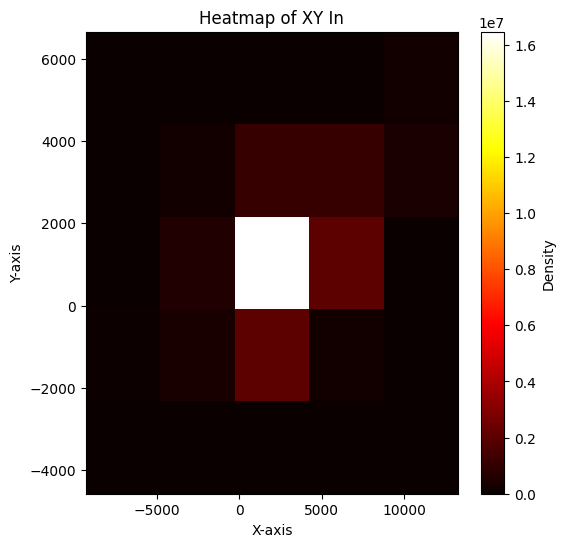

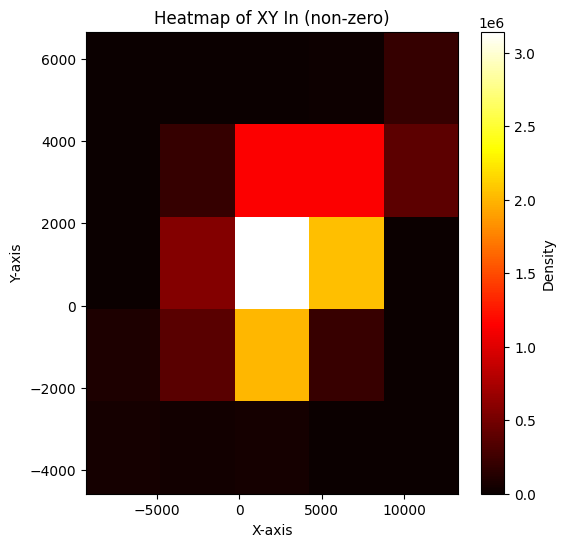

In [6]:
plot_heatmap(xy_in, title='Heatmap of XY In', bins=5)
plot_heatmap(xy_in_not_0, title='Heatmap of XY In (non-zero)', bins=5)

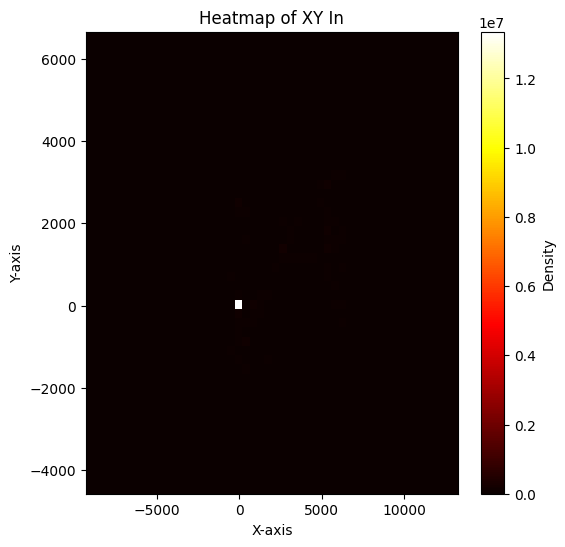

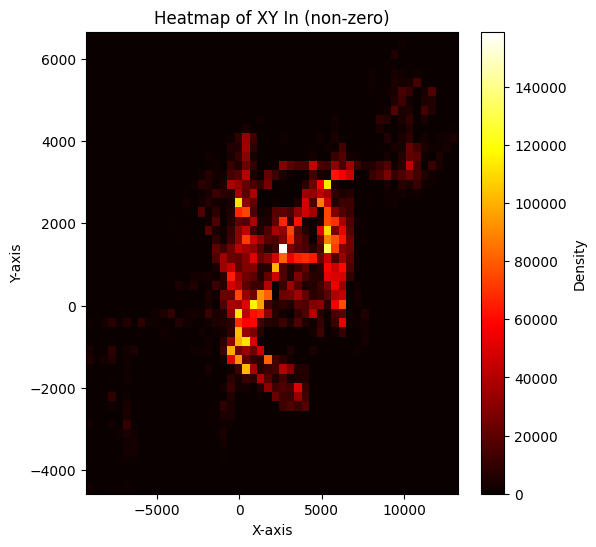

In [8]:
plot_heatmap(xy_in, title='Heatmap of XY In', bins=50)
plot_heatmap(xy_in_not_0, title='Heatmap of XY In (non-zero)', bins=50)

In [13]:
xy_out = train_data[:, :, 50:, :2].reshape(-1, 2)
xy_out_not_0 = xy_out[(xy_out[:, 0] != 0) & (xy_out[:, 1] != 0)]

In [17]:
print("Input shape:", xy_in.shape)
print("Output shape:", xy_out.shape)
# print("Sample input positions:", xy_in[0])
# print("Sample output positions:", xy_out[0])
xy_out_nz = xy_out[(xy_out[:, 0] != 0) & (xy_out[:, 1] != 0)]

Input shape: (10000, 50, 50, 2)
Output shape: (30000000, 2)


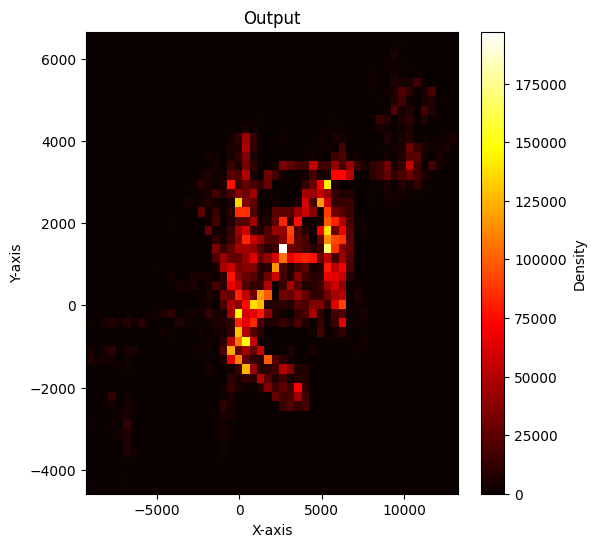

In [18]:
plot_heatmap(xy_out_nz, title="Output", bins=50)

Text(0.5, 1.0, 'Active Agent Count per Scene')

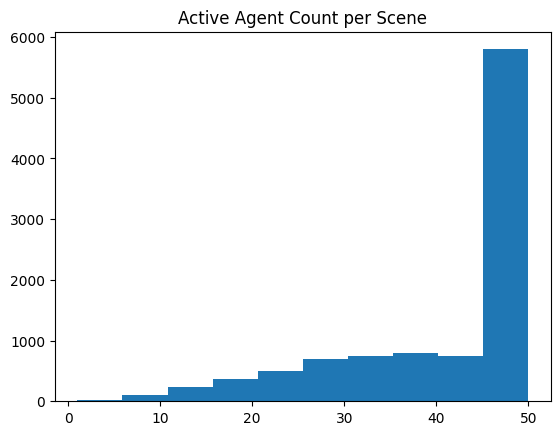

In [26]:
mask = np.any(train_data[:, :, :, :2] != 0, axis=-1)  # (scenes, agents, timesteps)
agent_counts = np.sum(np.any(mask, axis=-1), axis=1)
plt.hist(agent_counts); plt.title("Active Agent Count per Scene")


In [41]:
import matplotlib.ticker as mticker

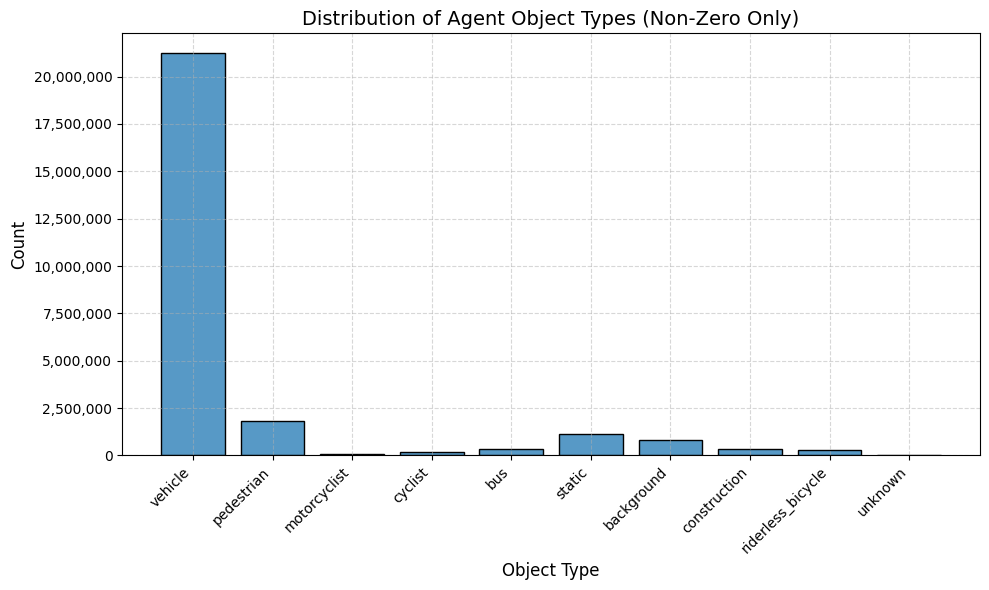

In [ ]:
object_types = ['vehicle', 'pedestrian', 'motorcyclist', 'cyclist', 'bus',
                'static', 'background', 'construction', 'riderless_bicycle', 'unknown']

valid_mask = np.any(train_data[:, :, :, :2] != 0, axis=-1)
types = train_data[:, :, :, 5][valid_mask].astype(int)

plt.figure(figsize=(10, 6))
sns.histplot(types, bins=np.arange(11)-0.5, discrete=True, shrink=0.8)

plt.xticks(ticks=np.arange(10), labels=object_types, rotation=45, ha='right')
plt.title("Distribution of Agent Object Types (Non-Zero Only)", fontsize=14)
plt.xlabel("Object Type", fontsize=12)
plt.ylabel("Count", fontsize=12)

plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

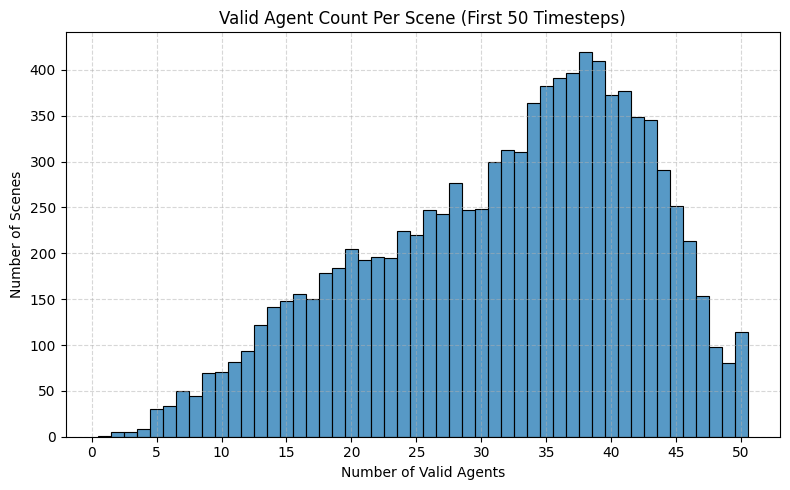

In [ ]:
input_positions = train_data[:, :, :50, :2]

non_zero_mask = np.any(input_positions != 0, axis=(2, 3))

valid_agent_counts = non_zero_mask.sum(axis=1) 

plt.figure(figsize=(8, 5))
sns.histplot(valid_agent_counts, bins=np.arange(0, 52) - 0.5, discrete=True)
plt.title("Valid Agent Count Per Scene (First 50 Timesteps)")
plt.xlabel("Number of Valid Agents")
plt.ylabel("Number of Scenes")
plt.xticks(np.arange(0, 51, 5))
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()